# Premier League team comparison

Here are our teams:

In [1]:
%matplotlib inline
import PremierLeagueData
data = PremierLeagueData.get_data(1993, 2014)
teams = sorted(data.keys())
for i in range(0, len(teams) / 3):
    print teams[i*3].ljust(25), teams[i*3 + 1].ljust(25), teams[i*3 + 2].ljust(25)
for i in range(-(len(teams) % 3), 0):
    print teams[i].ljust(25),

Arsenal                   Aston Villa               Barnsley                 
Birmingham                Blackburn                 Blackpool                
Bolton                    Bradford                  Burnley                  
Cardiff                   Charlton                  Chelsea                  
Coventry                  Crystal Palace            Derby                    
Everton                   Fulham                    Hull                     
Ipswich                   Leeds                     Leicester                
Liverpool                 Man City                  Man United               
Middlesboro               Middlesbrough             Newcastle                
Norwich                   Nott'm Forest             Oldham                   
Portsmouth                QPR                       Reading                  
Sheffield United          Sheffield Weds            Southampton              
Stoke                     Sunderland                Swansea     

Here is basic score level comparison through all years (1993-2014):  

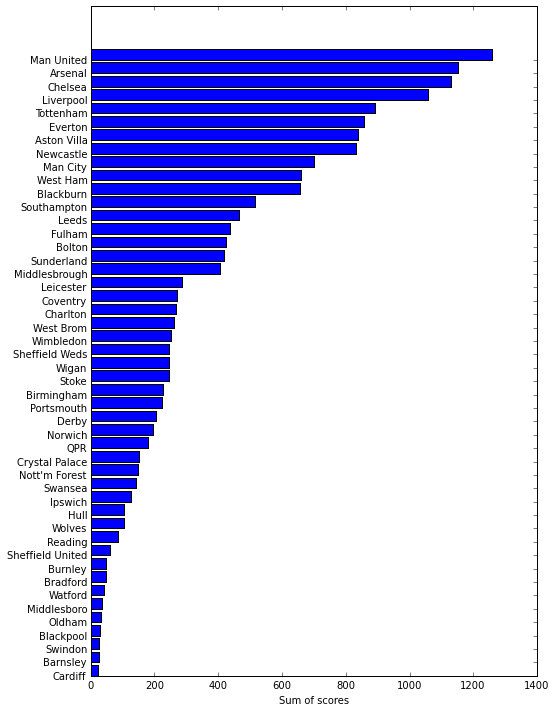

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = []
for team in teams:
    x.append(sum([0 if td is None else td.Scores for td in data[team]]))
    
plot_data = zip(teams, x)
plot_data.sort(key=lambda t: t[1])
y_pos = np.arange(len(plot_data))

plt.figure(figsize=(8, 12))
plt.barh(y_pos, [tup[1] for tup in plot_data])
plt.yticks(y_pos, [tup[0] for tup in plot_data])
plt.xlabel("Sum of scores")

plt.show()

From the chart above we can clearly determine leaders and outsiders. Now let's try to compare command histories. We will use correlation coeff and keep only regular League members:

In [51]:
topTeams = []
for team in teams:
    if len([t for t in data[team] if t == None]) < 5:
        topTeams.append(team)

sim_teams = []
for indexA, teamA in enumerate(teams):
    for indexB in range(indexA+1, len(teams)):
        teamB = teams[indexB]
        matrix = np.array([[x.Wins if x is not None else 0 for x in data[teamA]],\
                           [x.Wins if x is not None else 0 for x in data[teamB]]])
        corr = corrcoef(matrix)[0][1]
        if corr > 0.65 and (teamA in topTeams or teamB in topTeams):
            sim_teams.append((corr, teamA, teamB))
            
sim_teams.sort(key=lambda t: t[0], reverse=True )
for t in sim_teams:
    print t[1], '-', t[2], t[0]

Man City - Tottenham 0.733637997521
Stoke - Tottenham 0.675914858105
Swansea - Tottenham 0.659649511765
Chelsea - Portsmouth 0.651102600905


Let's have a look at Man City - Tottenham scores:

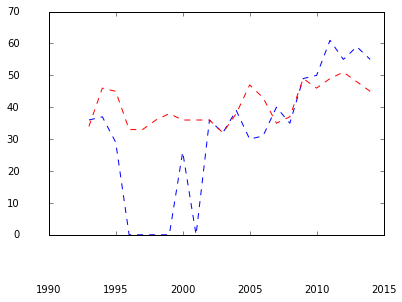

In [62]:
t1 = np.array([x.Scores if x is not None else 0 for x in data["Man City"]])
t2 = np.array([x.Scores if x is not None else 0 for x in data["Tottenham"]])
years = range(1993,2015)
plt.plot(years,t1,'b--',years,t2,'r--')
plt.show()

In addition let's calculate Jaccard index for League members for different years and find top 5 most similiar years:

In [13]:
def jaccard_index(year_data, yearA, yearB):
    teamsA = year_data[yearA]
    teamsB = year_data[yearB]
    
    intersection_count = len([x for x in teamsA if x in teamsB])
    union_count = len(teamsA) + len(teamsB) - intersection_count
    return float(intersection_count) / float(union_count)

sim_years = [] 
year_data = PremierLeagueData.get_teams_by_years(1993, 2014)
for yearA in range(1993, 2015):
    for yearB in range(yearA + 1, 2015):
        index = jaccard_index(year_data, yearA, yearB)
        sim_years.append((yearA, yearB, index))
        
sim_years.sort(key=lambda t: t[2], reverse=True)

for year_tup in sim_years[-5:]:
    yearA = year_tup[0]
    yearB = year_tup[1]
    index = year_tup[2]
    print yearA, yearB, index

1994 2009 0.30303030303
1998 2009 0.290322580645
1998 2011 0.290322580645
1999 2009 0.28125
1999 2011 0.28125
